## Introduction

**Last Updated**: 03/09/2024

**Embedded Capacity Register**: This refers to a register of site-specific data items for sites connected to the NGED (DNO) or those with an accepted connection offer, which: 

(a) Have an import capacity of any size and are subject to a DSR Contract of 50kW or more; and/or  
(b) Have an export capacity of any size and a registered capacity of 50kW or more.  

The required register format and data items are described in Schedule 31 (Embedded Capacity Register).

This Embedded Capacity Register (ECR) includes details of connected generation (including storage) and flexible demand resources connected to the DNO/IDNO's Distribution System.

**Generation assets** are included if the registered capacity is greater than or equal to 50kW.  
**Sites providing Demand Side Response (DSR)** are included if the contracted capacity is greater than or equal to 50kW.

The ECR is divided into two parts:

- **Part 1**: Provides information on generation (including storage) assets.
- **Part 2**: Provides information on demand sites offering Demand Side Response (DSR) services.

The sheets that make up the ECR are:

- **Definitions Part 1**: Describes the different data fields used in Part 1 of the ECR.
- **Register Part 1**: Comprises a list of generation (including storage) assets.
- **Definitions Part 2 (DSR)**: Describes the different data fields used in Part 2 of the ECR.
- **Register Part 2**: Comprises a list of demand sites providing DSR services.

<br></br>

[Note]: Features description is found **[here](./features.md)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st
import geopandas as gpd
import os, ast
from dotenv import load_dotenv, find_dotenv

Get Module Verions

In [2]:
import matplotlib, plotly, dotenv
for mod in [pd, np, matplotlib, st, plotly, gpd, dotenv]:
    try:
           print(f'{mod.__name__}=={mod.__version__}')
    except:
            from importlib.metadata import version
            print(f'{mod.__name__}=={version('python-dotenv')}')

pandas==2.2.2
numpy==1.26.4
matplotlib==3.9.2
streamlit==1.38.0
plotly==5.24.0
geopandas==1.0.1
dotenv==1.0.1


## Loading Process

**Sheets Loaded**
The workbook contains the following sheets, which have been loaded into a pandas DataFrame:

- **sheet index 2**. Register Part 1 50kW - <1MW
   - **Description:** This sheet includes data related to energy connections with capacities ranging from 50 kW to less than 1 MW.

 - **sheet index 3**. Register Part 1 - ≥1MW
   - **Description:** This sheet includes data for energy connections with capacities of 1 MW or greater.

**Data Structure**
- **Header Row:** The second row of each sheet is used as the header, which defines the column names for the data.
- **Combined Data:** The data from both sheets has been concatenated into a single DataFrame (by adding 1 under 2) for analysis, allowing for a comprehensive view of all connections across the specified capacity ranges.

In [3]:
df_dict = pd.read_excel("./datastore/nged ecr sep 2024.xlsx", sheet_name=[2,3], header=1)
type(df_dict)

dict

In [4]:
df_dict.keys()

dict_keys([2, 3])

## Preprocessing

Here, columns will be renamed for ease of use

Combine data to one

In [5]:
raw_data = pd.concat([df_dict[2], df_dict[3]]) # concat along rows
raw_data.shape

(6312, 50)

In [6]:
raw_data.head()

Export MPAN / MSID   Town/ City          County   \
0      1170000124890      Spalding    Lincolnshire   
1      1170001725100      Spalding    Lincolnshire   
2      1170001870001      Spalding    Lincolnshire   
3      1170000386383        Boston    Lincolnshire   
4      1170000165637  Peterborough  Cambridgeshire   

  Location (X-coordinate):Eastings (where data is held)  \
0                                             521470      
1                                             520170      
2                                             548330      
3                                             521680      
4                                             514070      

  Location (y-coordinate):Northings (where data is held)    Grid Supply Point  \
0                                             316790      Walpole 132Kv S Stn   
1                                             314820      Walpole 132Kv S Stn   
2                                             321730      Walpole 132Kv S Stn   
3                                             349910      Walpole 132Kv S Stn   
4                                             316420      Walpole 132Kv S Stn   

               Bulk Supply Point                       Primary  \
0  Spalding Clay Lake 33Kv S Stn        Crowland 33 11Kv S Stn   
1  Spalding Clay Lake 33Kv S Stn        Crowland 33 11Kv S Stn   
2       South Holland 33Kv S Stn     Long Sutton 33 11Kv S Stn   
3              Boston 33Kv S Stn        Langrick 33 11Kv S Stn   
4            Stamford 33Kv S Stn  Market Deeping 33 11Kv S Stn   

   Point of Connection (POC)\nVoltage (kV)  \
0                                      0.4   
1                                      0.4   
2                                      0.4   
3                                      0.4   
4                                      0.4   

                                       Licence Area   ...  \
0  National Grid Electricity Distribution (East M...  ...   
1  National Grid Electricity Distribution (East M...  ...   
2  National Grid Electricity Distribution (East M...  ...   
3  National Grid Electricity Distribution (East M...  ...   
4  National Grid Electricity Distribution (East M...  ...   

  Change to Maximum Import Capacity (MVA)  Date Accepted  \
0                                      NaN           NaN   
1                                      NaN           NaN   
2                                      NaN           NaN   
3                                      NaN           NaN   
4                                      NaN           NaN   

  Target Energisation Date  Distribution Service Provider (Y/N)  \
0                      NaT                                  NaN   
1                      NaT                                  NaN   
2                      NaT                                  NaN   
3                      NaT                                  NaN   
4                      NaT                                  NaN   

   Transmission Service Provider (Y/N)  Reference In a Connection Queue (Y/N)  \
0                                  NaN        NaN                         NaN   
1                                  NaN        NaN                         NaN   
2                                  NaN        NaN                         NaN   
3                                  NaN        NaN                         NaN   
4                                  NaN        NaN                         NaN   

  Distribution Reinforcement Reference Transmission Reinforcement Reference  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   Last Updated  
0    2024-09-03  
1    2024-09-03  
2    2024-09-0

In [7]:
raw_data.columns

Index(['Export MPAN / MSID', 'Town/ City ', 'County ',
       'Location (X-coordinate):Eastings (where data is held)',
       'Location (y-coordinate):Northings (where data is held)',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary',
       'Point of Connection (POC)\nVoltage (kV)', 'Licence Area ',
       'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Storage Capacity 1 (MWh)',
       'Storage Duration 1 (Hours)',
       'Energy Source & Energy Conversion Technology 1 - Registered Capacity (MW)',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Storage Capacity 2 (MWh)',
       'Storage Duration 2 (Hours)',
       'Energy Source & Energy Conversion Technology 2 - Registered Capacity (MW)',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Storage Capacity 3 (MWh)',
       'Storage Duration 3 (Hours)',
       'Energy Source & Energy Con

Remove extract space from feature names

In [8]:
raw_data.columns = [col.strip() for col in raw_data.columns]
raw_data.columns

Index(['Export MPAN / MSID', 'Town/ City', 'County',
       'Location (X-coordinate):Eastings (where data is held)',
       'Location (y-coordinate):Northings (where data is held)',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary',
       'Point of Connection (POC)\nVoltage (kV)', 'Licence Area',
       'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Storage Capacity 1 (MWh)',
       'Storage Duration 1 (Hours)',
       'Energy Source & Energy Conversion Technology 1 - Registered Capacity (MW)',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Storage Capacity 2 (MWh)',
       'Storage Duration 2 (Hours)',
       'Energy Source & Energy Conversion Technology 2 - Registered Capacity (MW)',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Storage Capacity 3 (MWh)',
       'Storage Duration 3 (Hours)',
       'Energy Source & Energy Conver

In [9]:

try:
	raw_data.rename(columns={'Location (X-coordinate):Eastings (where data is held)': 'Eastings',
						  	 'Export MPAN / MSID': 'Export MPAN_MSID',
                         	 'Location (y-coordinate):Northings (where data is held)': 'Northings',
							 'Point of Connection (POC)\nVoltage (kV)': 'PoC Voltage (KV)',
							 'Energy Source & Energy Conversion Technology 1 - Registered Capacity (MW)': 'Reg_Cap_Energy_Source_Conv_Tech_1',
							 'Energy Source & Energy Conversion Technology 2 - Registered Capacity (MW)': 'Reg_Cap_Energy_Source_Conv_Tech_2',
							 'Town/ City': 'Town_City', 'Export MPAN / MSID': 'Export MPAN_MSID', 'Import MPAN / MSID': 'Import MPAN_MSID',
							 'Energy Source & Energy Conversion Technology 3 - Registered Capacity (MW)': 'Reg_Cap_Energy_Source_Conv_Tech_3'
                         },
                         inplace=True)

	# raw_data.drop(labels=['Location (X-coordinate):\nEastings (where data is held)', 'Location (y-coordinate):\nNorthings (where data is held)'],
	# 					axis=1,
	# 					inplace=True)
except KeyError:
	print('Columns already renamed\n')
raw_data.columns

Index(['Export MPAN_MSID', 'Town_City', 'County', 'Eastings', 'Northings',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary', 'PoC Voltage (KV)',
       'Licence Area', 'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Storage Capacity 1 (MWh)',
       'Storage Duration 1 (Hours)', 'Reg_Cap_Energy_Source_Conv_Tech_1',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Storage Capacity 2 (MWh)',
       'Storage Duration 2 (Hours)', 'Reg_Cap_Energy_Source_Conv_Tech_2',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Storage Capacity 3 (MWh)',
       'Storage Duration 3 (Hours)', 'Reg_Cap_Energy_Source_Conv_Tech_3',
       'Flexible Connection (Yes/No)', 'Connection Status',
       'Already connected Registered Capacity (MW)',
       'Maximum Export Capacity (MW)', 'Maximum Export Capacity (MVA)',
       'Maximum Import Capacity (MW)', 'Maximu

In [10]:
raw_data.set_index('Export MPAN_MSID', inplace=True)

Rename Licence Area fields

In [11]:
def rename_LA_fields(area: str):
    match area:
        case 'National Grid Electricity Distribution (East Midlands) Plc':
            return 'East Midlands'
        case 'National Grid Electricity Distribution (West Midlands) Plc':
            return 'West Midlands'
        case 'National Grid Electricity Distribution (South West) Plc':
            return 'South West'
        case 'National Grid Electricity Distribution (South Wales) Plc':
            return 'South Wales'
        case _:
            return pd.NA
        
    

raw_data['Licence Area'] = raw_data['Licence Area'].apply(rename_LA_fields)

In [12]:
raw_data['Licence Area'].value_counts()

Licence Area
East Midlands    2094
West Midlands    1704
South West       1672
South Wales       842
Name: count, dtype: int64

In [13]:
raw_data.head()

Town_City          County Eastings Northings  \
Export MPAN_MSID                                                    
1170000124890         Spalding    Lincolnshire   521470    316790   
1170001725100         Spalding    Lincolnshire   520170    314820   
1170001870001         Spalding    Lincolnshire   548330    321730   
1170000386383           Boston    Lincolnshire   521680    349910   
1170000165637     Peterborough  Cambridgeshire   514070    316420   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ...  \
Export MPAN_MSID                                 ...   
1170000124890     East Midlands           Solar  ...   
1170001725100     East Midlands           Solar  ...   
1170001870001     East Midlands           Solar  ...   
1170000386383     East Midlands           Solar  ...   
1170000165637     East Midlands           Solar  ...   

                 Change to Maximum Import Capacity (MVA) Date Accepted  \
Export MPAN_MSID                                                         
1170000124890                                        NaN           NaN   
1170001725100                                        NaN           NaN   
1170001870001                                        NaN           NaN   
1170000386383                                        NaN           NaN   
1170000165637                                        NaN           NaN   

                  Target Energisation Date  \
Export MPAN_MSID                             
1170000124890                          NaT   
1170001725100                          NaT   
1170001870001                          NaT   
1170000386383                          NaT   
1170000165637                          NaT   

                  Distribution Service Provider (Y/N)  \
Export MPAN_MSID                                        
1170000124890                                     NaN   
1170001725100                                     NaN   
1170001870001                                     NaN   
1170000386383                                     NaN   
1170000165637                                     NaN   

                  Transmission Service Provider (Y/N) Reference  \
Export MPAN_MSID                                                  
1170000124890                                     NaN       NaN   
1170001725100                                     NaN       NaN   
1170001870001                                     NaN       NaN   
1170000386383                                     NaN       NaN   
1170000165637                                     NaN       NaN   

                 In a Connection Queue (Y/N)  \
Export MPAN_MSID                               
1170000124890                            NaN   
1170001725100                            NaN   
1170001870001                            NaN   
1170000386383                            NaN   
1170000165637                            NaN   

                 Distribution Reinforcement Reference  \
Export MPAN_MSID                                        

### Missing Values

Looking at features with all values missing

Flexible connection

In [14]:
raw_data['Flexible Connection (Yes/No)'].value_counts()

Series([], Name: count, dtype: int64)

Storage Duration

In [15]:
print(f"{raw_data['Storage Duration 1 (Hours)'].value_counts()}\n\n{raw_data['Storage Duration 2 (Hours)'].value_counts()}\n\n{raw_data['Storage Duration 3 (Hours)'].value_counts()}")

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)


Storage Capacity

In [16]:
print(f"{raw_data['Storage Capacity 1 (MWh)'].value_counts()}\n\n{raw_data['Storage Capacity 2 (MWh)'].value_counts()}\n\n{raw_data['Storage Capacity 3 (MWh)'].value_counts()}")

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)


Same goes for:
- Distribution Service Provider (Y/N)
- Transmission Service Provider (Y/N)
- Reference
- In a Connection Queue (Y/N)
- Distribution Reinforcement Reference
- Transmission Reinforcement Reference

So these 13 features will be dropped.

First change 'data not available' to `np.nan`

In [17]:

# Strip extra whitespace from all string columns
raw_data = raw_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

raw_data.replace(r'(?i)--REDACTED--', np.nan, inplace=True, regex=True)
raw_data.head(4)

C:\Users\abume\AppData\Local\Temp\ipykernel_23096\2845294706.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  raw_data = raw_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\abume\AppData\Local\Temp\ipykernel_23096\2845294706.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data.replace(r'(?i)--REDACTED--', np.nan, inplace=True, regex=True)


Town_City        County  Eastings  Northings  \
Export MPAN_MSID                                                
1170000124890     Spalding  Lincolnshire  521470.0   316790.0   
1170001725100     Spalding  Lincolnshire  520170.0   314820.0   
1170001870001     Spalding  Lincolnshire  548330.0   321730.0   
1170000386383       Boston  Lincolnshire  521680.0   349910.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   

                                    Primary  PoC Voltage (KV)   Licence Area  \
Export MPAN_MSID                                                               
1170000124890        Crowland 33 11Kv S Stn               0.4  East Midlands   
1170001725100        Crowland 33 11Kv S Stn               0.4  East Midlands   
1170001870001     Long Sutton 33 11Kv S Stn               0.4  East Midlands   
1170000386383        Langrick 33 11Kv S Stn               0.4  East Midlands   

                 Energy Source 1  ... Change to Maximum Import Capacity (MVA)  \
Export MPAN_MSID                  ...                                           
1170000124890              Solar  ...                                     NaN   
1170001725100              Solar  ...                                     NaN   
1170001870001              Solar  ...                                     NaN   
1170000386383              Solar  ...                                     NaN   

                 Date Accepted  Target Energisation Date  \
Export MPAN_MSID                                           
1170000124890              NaN                       NaT   
1170001725100              NaN                       NaT   
1170001870001              NaN                       NaT   
1170000386383              NaN                       NaT   

                  Distribution Service Provider (Y/N)  \
Export MPAN_MSID                                        
1170000124890                                     NaN   
1170001725100                                     NaN   
1170001870001                                     NaN   
1170000386383                                     NaN   

                  Transmission Service Provider (Y/N) Reference  \
Export MPAN_MSID                                                  
1170000124890                                     NaN       NaN   
1170001725100                                     NaN       NaN   
1170001870001                                     NaN       NaN   
1170000386383                                     NaN       NaN   

                 In a Connection Queue (Y/N)  \
Export MPAN_MSID                               
1170000124890                            NaN   
1170001725100                            NaN   
1170001870001                            NaN   
1170000386383                            NaN   

                 Distribution Reinforcement Reference  \
Export MPAN_MSID                                        
1170000124890                                     NaN   
1170001725100                                     NaN   
1170001870001                                     NaN   
1170000386383                                     NaN   

                  Transmission Reinforcement Reference  Last Updated  
Export MPAN_MSID                                                      
1170000124890                                      NaN    2024-09-03  
1170001725100                                      NaN    2024-09-03  
1170001870001                                      NaN    2024-09-03  
1170000386383                                      NaN    2024-09-03  

[4 rows x 49 columns]

### Change data types

Change `object` to accurate types - `float`, `date`


In [18]:

# to float
selected_floats = ['PoC Voltage (KV)',
				   'Maximum Export Capacity (MW)', 'Maximum Import Capacity (MW)',
				   'Maximum Export Capacity (MVA)', 'Maximum Import Capacity (MVA)',
                   'Already connected Registered Capacity (MW)', 'Accepted to Connect Registered Capacity (MW)',
				   'Reg_Cap_Energy_Source_Conv_Tech_2', 'Reg_Cap_Energy_Source_Conv_Tech_3']

# to int
selected_ints = ['Eastings', 'Northings']

# to date
selected_dates = ['Date Connected', 'Last Updated', 'Date Accepted', 'Target Energisation Date']

raw_data[selected_floats] = raw_data[selected_floats].astype('float')
raw_data[selected_ints] = raw_data[selected_ints].apply(pd.to_numeric, errors='coerce')
raw_data['Date Accepted'] = pd.to_datetime(raw_data['Date Accepted'], format='%d/%m/%Y', errors='coerce')

raw_data.sample(5)

Town_City         County  Eastings  Northings  \
Export MPAN_MSID                                                   
NaN                Lichfield  Staffordshire  406381.0   320014.0   
1170001511336        Lincoln   Lincolnshire  492380.0   365260.0   
2200043764609     Wadebridge       Cornwall  194940.0   768900.0   
2200042431393        Helston       Cornwall  169650.0   211300.0   
2200042390719     Launceston       Cornwall  225230.0   806700.0   

                        Grid Supply Point             Bulk Supply Point  \
Export MPAN_MSID                                                          
NaN                   Rugeley 132Kv S Stn                           NaN   
1170001511336     West Burton 132Kv S Stn  Lincoln Main No 1 33Kv S Stn   
2200043764609          Indian Queens  Sgp                   St Tudy Bsp   
2200042431393          Indian Queens  Sgp                      Rame Bsp   
2200042390719          Indian Queens  Sgp                   St Tudy Bsp   

                                      Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                  
NaN                                       NaN             132.0   
1170001511336     North Hykeham 33 11Kv S Stn              11.0   
2200043764609                        Polzeath               0.4   
2200042431393                      St Keverne               0.4   
2200042390719                         Laneast              11.0   

                   Licence Area Energy Source 1  ...  \
Export MPAN_MSID                                 ...   
NaN               West Midlands           Solar  ...   
1170001511336     East Midlands           Solar  ...   
2200043764609        South West           Solar  ...   
2200042431393        South West            Wind  ...   
2200042390719        South West            Wind  ...   

                 Change to Maximum Import Capacity (MVA) Date Accepted  \
Export MPAN_MSID                                                         
NaN                                             21.05263           NaT   
1170001511336                                        NaN           NaT   
2200043764609                                        NaN           NaT   
2200042431393                                        NaN           NaT   
2200042390719                                        NaN           NaT   

                  Target Energisation Date  \
Export MPAN_MSID                             
NaN                             2025-01-31   
1170001511336                          NaT   
2200043764609                          NaT   
2200042431393                          NaT   
2200042390719                          NaT   

                  Distribution Service Provider (Y/N)  \
Export MPAN_MSID                                        
NaN                                               NaN   
1170001511336                                     NaN   
2200043764609                                     NaN   
2200042431393                                     NaN   
2200042390719                                     NaN   

                  Transmission Service Provider (Y/N) Reference  \
Export MPAN_MSID                                                  
NaN                                               NaN       NaN   
1170001511336                                     NaN       NaN   
2200043764609                                     NaN       NaN   
2200042431393                                     NaN       NaN   
2200042390719                                     NaN       NaN   

                 In a Connection Queue (Y/N)  \
Export MPAN_MSID                               
NaN                                      NaN   
1170001511336                            NaN   
2200043764609                            NaN   
2200042431393                            NaN   
2200042390719                            NaN   

                 Distribution Reinforcement Reference  \
Export MPAN_MSID                               

In [19]:

data = raw_data.drop(labels=['Flexible Connection (Yes/No)',
                             'Storage Capacity 1 (MWh)', 'Storage Capacity 2 (MWh)', 'Storage Capacity 2 (MWh)', 'Storage Capacity 3 (MWh)',
                             'Storage Duration 1 (Hours)', 'Storage Duration 2 (Hours)', 'Storage Duration 3 (Hours)',
                             'Distribution Service Provider (Y/N)', 'Transmission Service Provider (Y/N)',
                             'Reference',
                             'In a Connection Queue (Y/N)',
                             'Distribution Reinforcement Reference', 'Transmission Reinforcement Reference'],
                	axis=1)

data.shape

(6312, 36)

In [20]:
gdata = gpd.GeoDataFrame(data)

gdata.head()

Town_City          County  Eastings  Northings  \
Export MPAN_MSID                                                      
1170000124890         Spalding    Lincolnshire  521470.0   316790.0   
1170001725100         Spalding    Lincolnshire  520170.0   314820.0   
1170001870001         Spalding    Lincolnshire  548330.0   321730.0   
1170000386383           Boston    Lincolnshire  521680.0   349910.0   
1170000165637     Peterborough  Cambridgeshire  514070.0   316420.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ...  \
Export MPAN_MSID                                 ...   
1170000124890     East Midlands           Solar  ...   
1170001725100     East Midlands           Solar  ...   
1170001870001     East Midlands           Solar  ...   
1170000386383     East Midlands           Solar  ...   
1170000165637     East Midlands           Solar  ...   

                 Maximum Import Capacity (MVA) Date Connected  \
Export MPAN_MSID                                                
1170000124890                            0.200     2013-08-30   
1170001725100                            0.069     2023-03-15   
1170001870001                            0.150     2023-07-25   
1170000386383                            0.070     2014-06-30   
1170000165637                            0.045     2014-05-01   

                  Accepted to Connect Registered Capacity (MW)  \
Export MPAN_MSID                                                 
1170000124890                                              NaN   
1170001725100                                              NaN   
1170001870001                                              NaN   
1170000386383                                              NaN   
1170000165637                                              NaN   

                 Change to Maximum Export Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                                       NaN   

                 Change to Maximum Export Capacity (MVA)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Import Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                           

In [21]:
gdata.geometry = gpd.points_from_xy(x=gdata.Eastings, y=gdata.Northings)
gdata.set_crs('EPSG:27700', inplace=True).head()

C:\Users\abume\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:221: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


Town_City          County  Eastings  Northings  \
Export MPAN_MSID                                                      
1170000124890         Spalding    Lincolnshire  521470.0   316790.0   
1170001725100         Spalding    Lincolnshire  520170.0   314820.0   
1170001870001         Spalding    Lincolnshire  548330.0   321730.0   
1170000386383           Boston    Lincolnshire  521680.0   349910.0   
1170000165637     Peterborough  Cambridgeshire  514070.0   316420.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ... Date Connected  \
Export MPAN_MSID                                 ...                  
1170000124890     East Midlands           Solar  ...     2013-08-30   
1170001725100     East Midlands           Solar  ...     2023-03-15   
1170001870001     East Midlands           Solar  ...     2023-07-25   
1170000386383     East Midlands           Solar  ...     2014-06-30   
1170000165637     East Midlands           Solar  ...     2014-05-01   

                 Accepted to Connect Registered Capacity (MW)  \
Export MPAN_MSID                                                
1170000124890                                             NaN   
1170001725100                                             NaN   
1170001870001                                             NaN   
1170000386383                                             NaN   
1170000165637                                             NaN   

                  Change to Maximum Export Capacity (MW)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Export Capacity (MVA)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Import Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                                       NaN   

                 Change to Maximum Import Capacity (MVA)  Date Accepted  \
Export MPAN_MSID                                                          
1170000124890                                        NaN            NaT   
1170001725100                                        NaN            NaT   
1170001870001                  

In [22]:
long_lat_gdata = gdata.to_crs(crs="EPSG:4326")

long_lat_gdata.head()

Town_City          County  Eastings  Northings  \
Export MPAN_MSID                                                      
1170000124890         Spalding    Lincolnshire  521470.0   316790.0   
1170001725100         Spalding    Lincolnshire  520170.0   314820.0   
1170001870001         Spalding    Lincolnshire  548330.0   321730.0   
1170000386383           Boston    Lincolnshire  521680.0   349910.0   
1170000165637     Peterborough  Cambridgeshire  514070.0   316420.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ... Date Connected  \
Export MPAN_MSID                                 ...                  
1170000124890     East Midlands           Solar  ...     2013-08-30   
1170001725100     East Midlands           Solar  ...     2023-03-15   
1170001870001     East Midlands           Solar  ...     2023-07-25   
1170000386383     East Midlands           Solar  ...     2014-06-30   
1170000165637     East Midlands           Solar  ...     2014-05-01   

                 Accepted to Connect Registered Capacity (MW)  \
Export MPAN_MSID                                                
1170000124890                                             NaN   
1170001725100                                             NaN   
1170001870001                                             NaN   
1170000386383                                             NaN   
1170000165637                                             NaN   

                  Change to Maximum Export Capacity (MW)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Export Capacity (MVA)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Import Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                                       NaN   

                 Change to Maximum Import Capacity (MVA)  Date Accepted  \
Export MPAN_MSID                                                          
1170000124890                                        NaN            NaT   
1170001725100                                        NaN            NaT   
1170001870001                  

In [23]:
fig = px.choropleth(data_frame=long_lat_gdata, geojson=long_lat_gdata['geometry'], locations='Licence Area')
fig.show()

###  Export Preprocessed

Export the preproessed data to csv format for ECRapp.py

In [24]:
data.to_csv('datastore/preprocess_ecr.csv')
gdata.to_file('datastore/preprocessed_geojson.geojson', driver='GeoJSON')
gdata.to_csv('datastore/geo_preprocessed_ecr.csv')

C:\Users\abume\AppData\Roaming\Python\Python312\site-packages\pyogrio\geopandas.py:523: UserWarning:

GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)



## EDA

In [25]:
geojson_data = gpd.read_file('datastore/preprocessed_geojson.geojson')
geojson_data.head()

Export MPAN_MSID     Town_City          County  Eastings  Northings  \
0    1170000124890      Spalding    Lincolnshire  521470.0   316790.0   
1    1170001725100      Spalding    Lincolnshire  520170.0   314820.0   
2    1170001870001      Spalding    Lincolnshire  548330.0   321730.0   
3    1170000386383        Boston    Lincolnshire  521680.0   349910.0   
4    1170000165637  Peterborough  Cambridgeshire  514070.0   316420.0   

     Grid Supply Point              Bulk Supply Point  \
0  Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1  Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
2  Walpole 132Kv S Stn       South Holland 33Kv S Stn   
3  Walpole 132Kv S Stn              Boston 33Kv S Stn   
4  Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                        Primary  PoC Voltage (KV)   Licence Area  ...  \
0        Crowland 33 11Kv S Stn               0.4  East Midlands  ...   
1        Crowland 33 11Kv S Stn               0.4  East Midlands  ...   
2     Long Sutton 33 11Kv S Stn               0.4  East Midlands  ...   
3        Langrick 33 11Kv S Stn               0.4  East Midlands  ...   
4  Market Deeping 33 11Kv S Stn               0.4  East Midlands  ...   

  Date Connected Accepted to Connect Registered Capacity (MW)  \
0     2013-08-30                                          NaN   
1     2023-03-15                                          NaN   
2     2023-07-25                                          NaN   
3     2014-06-30                                          NaN   
4     2014-05-01                                          NaN   

  Change to Maximum Export Capacity (MW)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Change to Maximum Export Capacity (MVA)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Change to Maximum Import Capacity (MW)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  Change to Maximum Import Capacity (MVA) Date Accepted  \
0                                     NaN          None   
1                                     NaN          None   
2                                     NaN          None   
3                                     NaN          None   
4                                     NaN          None   

   Target Energisation Date Last Updated               geometry  
0                       NaT   2024-09-03  POINT (521470 316790)  
1                       NaT   2024-09-03  POINT (520170 314820)  
2                       NaT   2024-09-03  POINT (548330 321730)  
3                       NaT   2024-09-03  POINT (521680 349910)  
4                       NaT   2024-09-03  POINT (514070 316420)  

[5 rows x 38 columns]

In [26]:
type(geojson_data[['Town_City', 'Grid Supply Point', 'Bulk Supply Point', 'Eastings', 'Northings', 'Licence Area']])

pandas.core.frame.DataFrame

In [27]:
geojson_data['Energy Source 1'].value_counts()


Energy Source 1
Solar                                        4274
Wind                                          757
Stored Energ                                  482
Fossil - Gas                                  162
Fossil - Oil                                   83
Biofuel - Landfill gas                         75
Biomass                                        68
Water                                          44
Waste                                          40
Biofuel - Biogas from anaerobic digestion      39
Fossil - Other                                 24
Biofuel - Sewage gas                           19
Geothermal                                     10
Biofuel - Other                                 9
Advanced Fuel                                   6
Fossil - Coal gas                               2
Name: count, dtype: int64

### Geolocations of Export MPAN_MSID

In [28]:
selected_features = ['Export MPAN_MSID', 'Town_City', 'Primary', 'Bulk Supply Point', 'Grid Supply Point', 'Licence Area', 'Eastings', 'Northings', 'geometry', 'Accepted to Connect Registered Capacity (MW)', 'Connection Status']# data['Target Energisation Date'].dt.date]
bounds = geojson_data.total_bounds

layers = (geojson_data.drop(selected_dates, axis=1)[selected_features]
          .explore(column='Licence Area',
                   tiles="CartoDB dark_matter",
                   vmin=bounds[1], vmax=bounds[3],
                   scheme='JenksCaspallForced'
                   ))

layers

The map shows some MPAN_MSID points are appearing outside of their expected licence areas, particularly in the South West, it seems there may be issues with the `Eastings` and `Northings` coordinates for those customers.

## Hierarchy of Registered Caps from Licence Area to Primary

In [29]:

grouped_data = geojson_data.groupby(['Licence Area', 'Bulk Supply Point', 'Primary']).agg({'Accepted to Connect Registered Capacity (MW)': 'sum',
                                                                                           'Already connected Registered Capacity (MW)': 'sum',
                                                                                           'Export MPAN_MSID': 'count'}).reset_index()

# Rename the column 'Export MPAN_MSID' to 'FSP Count'
grouped_data.rename(columns={'Export MPAN_MSID': 'FSP Count'}, inplace=True)

# Melt the dataframe to create a hierarchical structure
melted_data = pd.melt(grouped_data,
                      id_vars=['Licence Area', 'Bulk Supply Point', 'Primary', 'FSP Count'],
                      var_name='Capacity Type',
                      value_name='Capacity (MW)')

# Create a new column for the total (used for sorting)
melted_data['Total'] = melted_data.groupby(['Licence Area', 'Bulk Supply Point', 'Primary'])['Capacity (MW)'].transform('sum')

# Sort the dataframe
melted_data = melted_data.sort_values(['Total', 'Licence Area', 'Bulk Supply Point', 'Primary', 'Capacity Type'],
                                      ascending=[False, True, True, True, True])

# Create the sunburst chart with color based on 'Licence Area'
fig = px.sunburst(melted_data, 
                  path=['Licence Area', 'Bulk Supply Point', 'Primary', 'Capacity Type'], 
                  values='Capacity (MW)',
                  color='Licence Area',  # Color by 'Licence Area'
                  hover_data={'Capacity (MW)': True, 'FSP Count': True},
                  color_discrete_sequence=px.colors.qualitative.Bold  # Color palette for Licence Area
                  )

# Update layout with title, width, and height
fig.update_layout(title='Capacity Distribution by Licence Area, Bulk Supply Point, Primary, and FSP Count',
                  width=1000,
                  height=1000)

# Show the plot
# fig.show()


### Energy Sources Capacities

 - Registered, Import and Export Capacities

In [30]:

def plot_energy_source_by_cap(energy_source: str):
    '''Plots capacities by energy source.'''

    # Group and sum capacities by the specified energy source
    energy_cap_sources_group = (
        geojson_data.groupby(energy_source)[['Accepted to Connect Registered Capacity (MW)', 'Already connected Registered Capacity (MW)',
                                             'Maximum Export Capacity (MW)', 'Maximum Import Capacity (MW)',
                                             'Change to Maximum Export Capacity (MW)', 'Change to Maximum Import Capacity (MW)']]
                    .sum()
                    .reset_index())
    
	 # Calculate total capacities for sorting
    energy_cap_sources_group['Total Capacity'] = energy_cap_sources_group[['Accepted to Connect Registered Capacity (MW)',
																			'Already connected Registered Capacity (MW)',
																			'Maximum Export Capacity (MW)',
																			'Maximum Import Capacity (MW)']].sum(axis=1)
    # Sort by Total Capacity in descending order
    energy_cap_sources_group.sort_values(by='Total Capacity', ascending=False, inplace=True)

    # Create a bar chart
    fig = px.bar(
        data_frame=energy_cap_sources_group,
        x=energy_source,
        y=['Accepted to Connect Registered Capacity (MW)', 'Already connected Registered Capacity (MW)',
            'Maximum Export Capacity (MW)', 'Maximum Import Capacity (MW)'],
        barmode='stack',
        title=f'Registered Capacities, Import and Export for {energy_source}',
        height=600,
        color_discrete_sequence=['#000099', '#90109f', '#0000ff', '#2200ee']
    )

    # Update layout
    fig.update_layout(
        xaxis_title='Energy Source', 
        yaxis_title='Capacity (MW)',
        legend_title='Capacity Type', legend=dict(
													orientation="h",
                                                    yanchor="bottom", y=1.02, 
													xanchor="center", x=0.5  # Centered on the x-axis
												),
        bargap=0.2, bargroupgap=0.5, margin=dict(b=150))

    # Add total capacity text on top of bars
    total_capacity = energy_cap_sources_group[['Accepted to Connect Registered Capacity (MW)',
												'Already connected Registered Capacity (MW)',
												'Maximum Export Capacity (MW)',
												'Maximum Import Capacity (MW)']].sum(axis=1)

    for i, row in energy_cap_sources_group.iterrows():
        fig.add_annotation(x=row[energy_source], y=total_capacity[i],
            text=f"{total_capacity[i]:.2f} MW", showarrow=False,
            font=dict(size=10), yshift=10)  # Shift the text above the bar

    # Show the plot
    fig.show()
    


def plot_energy_source_by_conv_tech(source: str, tech: str, values: str):
    # Create a pivot table
    source_tech_pivot = geojson_data.pivot_table(columns=tech, index=source, values=values, fill_value=0, aggfunc='sum').reset_index()

    # Melt the pivot table for treemap plotting
    melted_data = source_tech_pivot.melt(id_vars=source, var_name=tech, value_name='Capacity')

    # Filter out rows where Capacity is zero
    melted_data = melted_data[melted_data['Capacity'] > 0]

    # Check if there are any valid entries left for plotting
    if melted_data.empty:
        print("No valid data.")
        return

    # Plotting with Plotly using a treemap
    fig = px.treemap(
        melted_data,
        path=[source, tech],
        values='Capacity',
        color='Capacity',
        color_continuous_scale='turbo',
        title=f'Energy Source Capacity by {tech}',
        labels={source: 'Energy Source', tech: 'Energy Conversion Technology', 'Capacity': 'Registered Capacity'}
    )

    # Show the plot
    fig.show()
    


def plot_accpeted_over_time_by_source(source: str):
	fig = px.line(data_frame=geojson_data.groupby(['Target Energisation Date', source])[['Accepted to Connect Registered Capacity (MW)',
																						'Maximum Export Capacity (MW)']].agg({'Accepted to Connect Registered Capacity (MW)': 'sum',
																															   'Maximum Export Capacity (MW)': 'sum'}).reset_index(), 
		x='Target Energisation Date', 
		y=['Accepted to Connect Registered Capacity (MW)', 'Maximum Export Capacity (MW)'],
		title=f'Total Accepted Capacity Over Time for {source}',
		markers='line+circle',
		color=source,
		# labels={'Target Energisation Date': 'Date', 'Accepted to Connect Registered Capacity (MW)': 'Capacity (MW)'},
		color_discrete_sequence=px.colors.carto.Agsunset
	)

	fig.show()

In [32]:
# geojson_data['Energy Source 1'][geojson_data['Energy Source 1'].str.contains('Stored Energy', na=False)].iloc[0]

#### Energy Source 1

In [33]:
plot_energy_source_by_cap('Energy Source 1')

> Summary Analysis of Energy Source Capacities

**Capacity OvervieW*
The following analysis summarises the capacities of various energy sources

- **Solar Energy**: Dominates the dataset with an *Accepted to Connect* capacity of *20.47GW* and a *Maximum Export* capacity of *4.38GW*. The changes in both export and import capacities are substantial at **16.94GW* and **4.61GW*, indicating strong growth potential.

- **Stored Energy**: Exhibits an impressive *Accepted to Connect* capacity of *24.32GW*, highlighting its critical role in energy storage solutions. The changes to maximum export and import capacities are also significant at **23.71GW* and **23.49GW*, respectively.

- **Wind Energy**: Shows a robust capacity with an *Accepted to Connect* value of *2.27GW* and a maximum export capacity of *1.41GW*. The changes indicate ongoing development with increases of *2.12GW* in export capacity.

- **Fossil Fuels**: The capacities for fossil fuels vary, with *Fossil - Oil* having a notable already connected capacity of *543.15MW*, while other fossil sources show lower accepted capacities, indicating a declining trend in new connections.

- **Waste Energy**: Has an already connected capacity of *617.54MW*, reflecting its role as a supplementary energy source despite having no accepted capacity.

- **Biomass and Biofuels**: These categories show varied capacities, with biofuel - landfill gas having an accepted capacity of *64.50MW*, while biomass has an accepted capacity of *62.10MW*, indicating their importance in renewable energy generation.

>Key Insights
- The data reflects a clear trend towards renewable energy sources, particularly solar and stored energy, which dominate the accepted capacities.
- Fossil fuel sources are showing minimal new connections, suggesting a shift towards more sustainable energy solutions.
- The significant changes in export and import capacities for solar and stored energy suggest that these sectors are rapidly evolving and expanding.


In [34]:
plot_energy_source_by_conv_tech(source=f'Energy Source 1', tech=f'Energy Conversion Technology 1', values=f'Reg_Cap_Energy_Source_Conv_Tech_1')

In [35]:
plot_accpeted_over_time_by_source('Energy Source 1')

#### Energy Source 2

In [36]:
plot_energy_source_by_cap('Energy Source 2')


> Summary Analysis of Energy Source Capacities (Energy Source 2)

**Capacity OvervieW*
The following analysis summarizes the capacities of various energy sources, converted from MW to GW where applicable.

- **Solar Energy**: Exhibits the highest *Accepted to Connect* capacity at *1.62GW* and a significant *Maximum Export* capacity of *187.68MW*. The large changes in both export and import capacities indicate strong growth potential.
  
- **Stored Energy**: Has a substantial *Accepted to Connect* capacity of *6.15GW*, highlighting its critical role in energy storage solutions. The changes to maximum export and import capacities are also significant at *3.47GW* and *2.48GW*, respectively.

- **Wind Energy**: Shows a robust capacity with an *Accepted to Connect* value of *151.57MW* and a notable *Maximum Export* capacity of *38.65MW*. The changes indicate ongoing development and integration into the energy grid.

- **Biomass**: Displays an *Accepted to Connect* capacity of *13.15MW*, with a high *Maximum Export* capacity of *120.3MW*, suggesting its importance in renewable energy generation.

- **Fossil Fuels**: Generally show low values for accepted capacities, with the highest being from *Fossil - Gas* at *0.78MW*, indicating a declining trend in new fossil fuel connections.

- **Water and Biofuels**: These categories have lower capacities overall, with water having an accepted capacity of *0.1MGW*, while various biofuels have minimal accepted capacities but some existing connected capacities.

> Key Insights
- The data reflects a clear trend towards renewable energy sources, particularly solar and stored energy, which dominate the accepted capacities.
- Fossil fuel sources are showing minimal new connections, indicating a potential shift in policy or market dynamics towards sustainability.
- The significant changes in export and import capacities for solar and stored energy suggest that these sectors are rapidly evolving and expanding.


In [37]:
plot_energy_source_by_conv_tech(source=f'Energy Source 2', tech=f'Energy Conversion Technology 2', values=f'Reg_Cap_Energy_Source_Conv_Tech_2')

In [38]:
plot_accpeted_over_time_by_source('Energy Source 2')

#### Energy Source 3

In [39]:
plot_energy_source_by_cap('Energy Source 3')

> Summary Analysis of Energy Source Capacities (Energy Source 3)

**Capacity OvervieW*
The following analysis summarizes the capacities of various energy sources, converted from MW to GW where applicable.

- **Solar Energy**: Displays a significant *Accepted to Connect* capacity of *422MW* and a *Maximum Export* capacity of *21.29MW*, indicating strong potential for further development. The changes in export and import capacities are also notable at *333.90MW* and *20.05MW*, respectively.

- **Stored Energy**: Has an *Accepted to Connect* capacity of *114.97MW*, with a maximum export capacity of *19.22MW*. The changes in maximum export and import capacities are substantial at *47.09MW* and *26.82MW*, highlighting its importance in energy storage solutions.

- **Wind Energy**: Shows an *Accepted to Connect* capacity of *203MW* and a maximum export capacity of *7.46MW*, with significant increases in both export and import capacities at *63.00MW* and *45.70MW*, respectively.

- **Fossil Fuels**: The capacities for fossil fuels are relatively low, with *Fossil - Gas* having an already connected capacity of *19.26MW*, indicating a declining trend in new connections.

- **Waste Energy**: Has minimal accepted capacity at *0MW*, but an already connected capacity of *3.93MW*, reflecting its role as a supplementary energy source.

>Key Insights
- The data indicates a strong emphasis on renewable energy sources, particularly solar and stored energy, which dominate the accepted capacities.
- Wind energy also shows robust growth potential, with significant changes in both export and import capacities.
- Fossil fuel sources are experiencing minimal new connections, suggesting a shift towards more sustainable energy solutions.


In [40]:
plot_energy_source_by_conv_tech(source=f'Energy Source 3', tech=f'Energy Conversion Technology 3', values=f'Reg_Cap_Energy_Source_Conv_Tech_3')

In [41]:
# (geojson_data['Last Updated'].max())
geojson_data.columns
geojson_data['Change to Maximum Import Capacity (MW)'].value_counts()

Change to Maximum Import Capacity (MW)
49.9000    85
0.1000     83
0.2000     66
0.5000     55
99.9000    45
           ..
0.6315      1
0.1670      1
0.2150      1
0.4750      1
6.1200      1
Name: count, Length: 284, dtype: int64

In [42]:
plot_accpeted_over_time_by_source('Energy Source 3')

### General Insights for Energy source capacities

- The data across all three sources reflects a clear trend towards renewable energy adoption, particularly solar and stored energy.
- Fossil fuel capacities are declining in terms of new connections, suggesting a broader strategy to reduce carbon emissions.

> Energy Source 1 Capacity Summary

 **Significant Capacities (>1GW)**:
- Solar:
  * Accepted to Connect: 20.47GW
  * Already Connected: 4.45GW
  * Maximum Export: 4.38GW
- Stored Energy:
  * Accepted to Connect: 24.32GW
- Wind:
  * Accepted to Connect: 2.27GW
  * Already Connected: 1.52GW
  * Maximum Export: 1.41GW

**Notable Capacities (100MW-1GW)**:
- Fossil - Gas:
  * Accepted to Connect: 290.95MW
  * Already Connected: 920.16MW
  * Maximum Export: 883.56MW
- Fossil - Oil:
  * Already Connected: 543.15MW
  * Maximum Export: 417.97MW
  * Maximum Import: 298.68MW
- Waste:
  * Accepted to Connect: 284.90MW
  * Already Connected: 617.54MW
  * Maximum Export: 505.91MW

**Other Insights**:
 - Stored Energy shows the highest Accepted to Connect capacity (24.32GW) but much lower Already Connected capacity (597.70MW), suggesting significant planned expansion.
 - Solar has the second-highest Accepted to Connect capacity (20.47GW) and the highest Already Connected capacity (4.45GW) among renewable sources.
 - Wind energy shows substantial capacities across all categories, indicating a mature and growing sector.
 - Traditional fossil fuels (Gas, Oil) still maintain significant capacities, especially in Already Connected and Maximum Export categories.
 - Biomass, Biofuels (especially Landfill gas), and Waste energy show moderate capacities, contributing to the diverse energy mix.
 - Geothermal, Water, and Advanced Fuel sources show relatively lower capacities, suggesting they play a smaller role in the overall energy landscape.

In [43]:
geojson_data.pivot_table(columns='Energy Conversion Technology 2',
                         index='Energy Source 2',
                         values='Reg_Cap_Energy_Source_Conv_Tech_2',
                         fill_value=0, margins=True, margins_name='Total',aggfunc='sum')

Energy Conversion Technology 2             Engine (combustion / reciprocating)  \
Energy Source 2                                                                  
Advanced Fuel                                                            0.000   
Biofuel - Biogas from anaerobic digestion                               28.290   
Biofuel - Landfill gas                                                   1.180   
Biofuel - Other                                                          0.045   
Biofuel - Sewage gas                                                     0.015   
Biomass                                                                  0.000   
Fossil - Gas                                                             3.965   
Fossil - Oil                                                             1.425   
Fossil - Other                                                           3.925   
Solar                                                                    0.000   
Stored Energ                                                             0.000   
Water                                                                    0.000   
Wind                                                                     0.000   
Total                                                                   38.845   

Energy Conversion Technology 2             Gas turbine (OCGT)  Hydro - Other  \
Energy Source 2                                                                
Advanced Fuel                                           0.035           0.00   
Biofuel - Biogas from anaerobic digestion               0.000           0.00   
Biofuel - Landfill gas                                  0.000           0.00   
Biofuel - Other                                         0.000           0.00   
Biofuel - Sewage gas                                    0.020           0.00   
Biomass                                                 0.000           0.00   
Fossil - Gas                                            1.190           0.00   
Fossil - Oil                                            0.000           0.00   
Fossil - Other                                          0.000           0.00   
Solar                                                   0.000           0.00   
Stored Energ                                            0.000           0.00   
Water                                                   0.000           0.78   
Wind                                                    0.000           0.00   
Total                                                   1.245           0.78   

Energy Conversion Technology 2             Hydro - Reservoir (not pumped)  \
Energy Source 2                                                             
Advanced Fuel                                                        0.00   
Biofuel - Biogas from anaerobic digestion                            0.00   
Biofuel - Landfill gas                                               0.00   
Biofuel - Other                                                      0.00   
Biofuel - Sewage gas                                                 0.00   
Biomass                                                              0.00   
Fossil - Gas                                                         0.00   
Fossil - Oil                                                         0.00   
Fossil - Other                                                       0.00   
Solar                                                                0.00   
Stored Energ                                                         0.00   
Water                                                                1.08   
Wind                                                                 0.00   
Total                                                                1.08   

Energy Conversion Technology 2             Hydro - Run of river  \
Energy Source 2                                                   
Advanced Fuel                          

In [44]:
geojson_data.pivot_table(columns='Energy Conversion Technology 3',
                         index='Energy Source 3',
                         values='Reg_Cap_Energy_Source_Conv_Tech_3',
                         fill_value=0, margins=True, margins_name='Total', aggfunc='sum')

Energy Conversion Technology 3  Engine (combustion / reciprocating)  \
Energy Source 3                                                       
Fossil - Gas                                                    2.0   
Solar                                                           0.0   
Stored Energ                                                    0.0   
Waste                                                           0.0   
Wind                                                            0.0   
Total                                                           2.0   

Energy Conversion Technology 3  Onshore wind turbines  Photovoltaic  \
Energy Source 3                                                       
Fossil - Gas                                     0.00      0.000000   
Solar                                            0.00     53.472805   
Stored Energ                                     0.00      0.000000   
Waste                                            0.00      0.000000   
Wind                                            68.19      0.000000   
Total                                           68.19     53.472805   

Energy Conversion Technology 3  Steam turbine (thermal power plant)  \
Energy Source 3                                                       
Fossil - Gas                                                    0.0   
Solar                                                           0.0   
Stored Energ                                                    0.0   
Waste                                                           1.2   
Wind                                                            0.0   
Total                                                           1.2   

Energy Conversion Technology 3  Storage - Electrochemical  (Batteries)  \
Energy Source 3                                                          
Fossil - Gas                                                     0.000   
Solar                                                            0.000   
Stored Energ                                                    27.623   
Waste                                                            0.000   
Wind                                                             0.000   
Total                                                           27.623   

Energy Conversion Technology 3  Storage - Mechanical - Compressed Air (Adiabatic & Diabatic)  \
Energy Source 3                                                                                
Fossil - Gas                                                                 0.00              
Solar                                                                        0.00              
Stored Energ                                                                 0.15              
Waste                                                                        0.00              
Wind                                                                         0.00              
Total                                                                        0.15              

Energy Conversion Technology 3       Total  
Energy Source 3                             
Fossil - Gas                      2.000000  
Solar                            53.472805  
Stored Energ                     27.773000  
Waste                             1.200000  
Wind                             68.190000  
Total                           152.635805

In [45]:
geojson_data['Energy Source 3'].value_counts()

Energy Source 3
Solar           11
Stored Energ     7
Wind             6
Waste            1
Fossil - Gas     1
Name: count, dtype: int64

In [46]:

# Sort the data by date to ensure proper line connection
geojson_data_sorted = geojson_data.sort_values('Target Energisation Date')

# Create the line plot
fig = px.line(
    data_frame=geojson_data_sorted,
    x='Target Energisation Date',
    y='Accepted to Connect Registered Capacity (MW)',
    title='Accepted to Connect Registered Capacity Over Time',
    color='PoC Voltage (KV)',
    color_discrete_sequence=['#000088', '#0000ee', '#1040ff', '#6010d5', '#800080'],
    labels={
        'Target Energisation Date': 'Date',
        'Accepted to Connect Registered Capacity (MW)': 'Capacity (MW)'
    },
    line_shape='linear',  # You can change this to 'spline' for a smoother curve
    render_mode='svg'  # For better performance with large datasets
)

# Customize the layout
fig.update_layout(
    xaxis_title='Target Energisation Date',
    yaxis_title='Accepted to Connect Registered Capacity (MW)',
    hovermode='x unified',
    legend_title_text='Legend',
)

fig.update_traces(mode='lines+markers')

# Add range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Show the plot
fig.show()

In [47]:
geojson_data_sorted = geojson_data.sort_values('Target Energisation Date')
# Ensure 'Accepted to Connect Registered Capacity (MW)' has no NaN values
geojson_data_sorted['Accepted to Connect Registered Capacity (MW)'] = geojson_data_sorted['Accepted to Connect Registered Capacity (MW)'].fillna(1)

# Filter out rows with missing 'Target Energisation Date'
geojson_data_sorted = geojson_data_sorted.dropna(subset=['Target Energisation Date'])

# Extract the year from 'Target Energisation Date' and cast it as a string for animation
geojson_data_sorted['Year'] = geojson_data_sorted['Target Energisation Date'].dt.year.astype(str)

# Create the scatter plot
fig = px.scatter(
    data_frame=geojson_data_sorted,
    x='Target Energisation Date',
    y='Accepted to Connect Registered Capacity (MW)',
    title='Accepted to Connect Registered Capacity Over Time',
    labels={
        'Target Energisation Date': 'Date',
        'Accepted to Connect Registered Capacity (MW)': 'Capacity (MW)',
        'Licence Area': 'Licence Area'
    },
    color='Licence Area',  # Color points by Licence Area
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Use a discrete color sequence
    size='Accepted to Connect Registered Capacity (MW)',  # Size points by capacity
    size_max=30,  # Set maximum marker size
    hover_data=['Energy Source 1', 'Energy Conversion Technology 1', 'Energy Source 2', 'Energy Conversion Technology 2',
                'Energy Source 3', 'Energy Conversion Technology 3', 'PoC Voltage (KV)'],
    # animation_frame='Year',y
)

# Customize the layout to reposition the animator inside the figure
fig.update_layout(
    xaxis_title='Target Energisation Date',
    yaxis_title='Accepted to Connect Registered Capacity (MW)',
    hovermode='closest',
    legend_title_text='Licence Area',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1 ),
)


# Show the plot
fig.show()


> **Analysis**

 **Capacity Accepted**
- The majority of FSPs (Final Supply Points) are set to energise between **2024** and **2026**, with the **East Midlands** and **West Midlands** leading in total accepted capacity. The increase in capacity during this period suggests that these regions are key growth areas for energy infrastructure development.

 **PoC Voltage**
- A large number of energisations are scheduled at **132KV** voltage levels, particularly between **2024** and **2026**, predominantly in the **East Midlands** and **West Midlands**. This highlights a significant investment in high-voltage projects in these areas during the specified time frame.

 **Energy Source**
- **Solar** and **Stored Energy** are the dominant energy sources for energisation during the **2024-2026** period across all licence areas. These sources are reflective of the ongoing shift towards renewable energy and energy storage solutions in the UK's energy landscape.

 **Capacity Look**


- **2025** is the peak year for accepted capacity, with over **41.395GW** planned for energisation, far exceeding the capacity of other years.
- The capacity drops significantly after **2025**, with smaller but steady additions between **2026** and **2037**.
- A notable decrease occurs in **2029**, with only **108.9MW** planned, but slight increases are projected in **2032** and **2033**.
  
This dataset indicates that the majority of infrastructure development is concentrated in the next few years, particularly in **2024** and **2025**, with a significant reduction in projects after **2026**.

In [48]:
display(geojson_data_sorted[['Energy Source 1', 'Energy Conversion Technology 1', 'Energy Source 2', 'Energy Conversion Technology 2',
                'Energy Source 3', 'Energy Conversion Technology 3', 'PoC Voltage (KV)', 'Target Energisation Date', 'Year']])

Energy Source 1          Energy Conversion Technology 1 Energy Source 2  \
5262    Stored Energ  Storage - Electrochemical  (Batteries)            None   
5938           Solar                            Photovoltaic            None   
3905           Solar                            Photovoltaic    Stored Energ   
3747           Solar                            Photovoltaic            None   
3969           Solar                            Photovoltaic            None   
...              ...                                     ...             ...   
5842    Stored Energ  Storage - Electrochemical  (Batteries)            None   
6150    Stored Energ  Storage - Electrochemical  (Batteries)            None   
6205           Solar                            Photovoltaic            None   
6250           Solar                            Photovoltaic            None   
5683           Solar                            Photovoltaic            None   

              Energy Conversion Technology 2 Energy Source 3  \
5262                                    None            None   
5938                                    None            None   
3905  Storage - Electrochemical  (Batteries)            None   
3747                                    None            None   
3969                                    None            None   
...                                      ...             ...   
5842                                    None            None   
6150                                    None            None   
6205                                    None            None   
6250                                    None            None   
5683                                    None            None   

     Energy Conversion Technology 3  PoC Voltage (KV)  \
5262                           None              33.0   
5938                           None              11.0   
3905                           None               0.4   
3747                           None              11.0   
3969                           None               0.4   
...                             ...               ...   
5842                           None             132.0   
6150                           None             132.0   
6205                           None              33.0   
6250                           None              33.0   
5683                           None              33.0   

     Target Energisation Date  Year  
5262               2023-06-06  2023  
5938               2023-12-21  2023  
3905               2024-07-03  2024  
3747               2024-09-02  2024  
3969               2024-09-03  2024  
...                       ...   ...  
5842               2037-01-01  2037  
6150               2037-10-31  2037  
6205               2037-12-31  2037  
6250               2037-12-31  2037  
5683               2038-01-02  2038  

[1581 rows x 9 columns]

In [49]:
import matplotlib, plotly, dotenv
for mod in [pd, np, matplotlib, st, plotly, gpd, dotenv]:
    try:
           print(f'{mod.__name__}=={mod.__version__}')
    except:
            from importlib.metadata import version
            print(f'{mod.__name__}=={version('python-dotenv')}')

pandas==2.2.2
numpy==1.26.4
matplotlib==3.9.2
streamlit==1.38.0
plotly==5.24.0
geopandas==1.0.1
dotenv==1.0.1


Analysis of Import and Export Capacities per Voltage level.

In [50]:

voltage_energy_group = geojson_data.groupby('PoC Voltage (KV)')[['Maximum Export Capacity (MW)',
                                                                 'Maximum Import Capacity (MW)',
                                                                 'Change to Maximum Export Capacity (MW)',
                                                                 'Change to Maximum Import Capacity (MW)']].sum().reset_index()

fig = px.bar(data_frame=voltage_energy_group,
             x='PoC Voltage (KV)',
             y=['Maximum Export Capacity (MW)', 'Maximum Import Capacity (MW)',
				'Change to Maximum Export Capacity (MW)', 'Change to Maximum Import Capacity (MW)'],
             barmode='group',
             color_discrete_sequence=['#000080', '#0000FF', '#1E90FF', '#9900ff'],
             hover_data={'PoC Voltage (KV)': True},
             labels={'value': 'Capacity (MW)', 'variable': 'Capacity Type'})

fig.update_layout(title='Import and Export Capacities per PoC Voltage',
                  yaxis_title='Capacity (MW)',
                  legend_title='Capacity Type',
                  xaxis={'tickmode': 'array',
                         'tickvals': sorted(voltage_energy_group['PoC Voltage (KV)'].unique()),
                         'ticktext': sorted(voltage_energy_group['PoC Voltage (KV)'].unique())})

fig.show()

> ### Insights on PoC Voltage Capacity Data

**Voltage Levels**: The data covers 5 different voltage levels: 0.4 kV, 11 kV, 33 kV, 66 kV, and 132 kV.

> [!TIP]
> 66KV PoC voltage exits only in West Midlands

1. **Export Capacity**
   - The highest Maximum Export Capacity is at 33kV - 4.592GW, followed by 11kV - 2.233GW.
   - The lowest Maximum Export Capacity is at 66kV - 537.73 MW.

2. **Import Capacity**
   - The highest Maximum Import Capacity is at 04kV - 368.60MW, followed closely by 11kV - 1.324GW.
   - The lowest Maximum Import Capacity is at 66kV (45.64 MW).

3. **Changes in Capacity**
   - There are significant planned increases in both export and import capacities across all voltage levels.
   - The largest increase in export capacity is at 132kV - 33.93GW.
   - The largest increase in import capacity is also at 132kV - 25.02GW.

4. **Capacity Ratios**
   - At 0.4kV and 11kV, the export capacity is higher than the import capacity.
   - At 33kV, 66kV, and 132kV, the export capacity is significantly higher than the import capacity.

5. **Network Development**
   - The substantial increases in both export and import capacities suggest significant network reinforcement or flexibilities input.
   - The focus seems to be on increasing capacity at higher voltage levels, particularly at 132kV.

6. **Potential Implications**
   - The large increases in export capacity, especially at higher voltages, might indicate preparations for integrating more renewable energy sources or large-scale generators.
   - The increases in import capacity could suggest preparations for growing demand or the integration of large consumers like industrial facilities.


In [61]:
# Reshape the data for sunburst chart
load_dotenv(find_dotenv('styling.env'))

blues = ast.literal_eval(os.getenv('blues'))

dno_voltage_energy_group = geojson_data.groupby(['Licence Area', 'PoC Voltage (KV)'])[['Maximum Export Capacity (MW)',
																					   'Maximum Import Capacity (MW)',
																					   'Change to Maximum Export Capacity (MW)',
																					   'Change to Maximum Import Capacity (MW)']].sum().reset_index()

sunburst_data = pd.melt(dno_voltage_energy_group, 
                        id_vars=['Licence Area', 'PoC Voltage (KV)'], 
                        value_vars=['Maximum Export Capacity (MW)',
									'Maximum Import Capacity (MW)',
									'Change to Maximum Export Capacity (MW)',
									'Change to Maximum Import Capacity (MW)'],
                        var_name='Capacity Type', 
                        value_name='Capacity (MW)',
                        )

# Create the sunburst chart
fig = px.sunburst(sunburst_data, 
                  path=['Licence Area', 'PoC Voltage (KV)', 'Capacity Type'], 
                  values='Capacity (MW)',
                  color='Licence Area',
                  color_discrete_sequence=blues,
                  hover_data={'Capacity (MW)': ':.2f'},
                  branchvalues='total',
                  height=600)

fig.update_layout(title='Import Export Capacity Distribution by Licence Area and Voltage',
                  margin=dict(t=30, l=0, r=0, b=0))

fig.show()

In [60]:
sunburst_data

Licence Area  PoC Voltage (KV)                           Capacity Type  \
0   East Midlands               0.4            Maximum Export Capacity (MW)   
1   East Midlands              11.0            Maximum Export Capacity (MW)   
2   East Midlands              33.0            Maximum Export Capacity (MW)   
3   East Midlands              66.0            Maximum Export Capacity (MW)   
4   East Midlands             132.0            Maximum Export Capacity (MW)   
..            ...               ...                                     ...   
75  West Midlands               0.4  Change to Maximum Import Capacity (MW)   
76  West Midlands              11.0  Change to Maximum Import Capacity (MW)   
77  West Midlands              33.0  Change to Maximum Import Capacity (MW)   
78  West Midlands              66.0  Change to Maximum Import Capacity (MW)   
79  West Midlands             132.0  Change to Maximum Import Capacity (MW)   

    Capacity (MW)  
0       207.04080  
1       772.85730  
2      1887.28995  
3         2.05020  
4       543.78000  
..            ...  
75       10.28020  
76      197.39250  
77      573.88200  
78      635.81900  
79     9097.01500  

[80 rows x 4 columns]

In [52]:
geojson_data.groupby(['Energy Source 1', 'Energy Source 2', 'Energy Source 3']).agg({
                                                                                                    'Accepted to Connect Registered Capacity (MW)': 'sum',
                                                                                                    'Connection Status': 'count',
                                                                                                    'PoC Voltage (KV)': 'count'
                                                                                                }).reset_index()

Energy Source 1  Energy Source 2 Energy Source 3  \
0          Biomass             Wind           Solar   
1     Fossil - Gas     Stored Energ           Solar   
2     Fossil - Oil            Solar            Wind   
3     Fossil - Oil            Water           Solar   
4   Fossil - Other  Biofuel - Other           Solar   
5   Fossil - Other            Solar    Fossil - Gas   
6            Solar     Stored Energ    Stored Energ   
7            Solar     Stored Energ            Wind   
8            Solar            Water    Stored Energ   
9            Solar             Wind    Stored Energ   
10    Stored Energ   Fossil - Other           Solar   
11    Stored Energ            Solar            Wind   
12            Wind            Solar    Stored Energ   
13            Wind     Stored Energ           Solar   
14            Wind             Wind            Wind   

    Accepted to Connect Registered Capacity (MW)  Connection Status  \
0                                          0.000                  1   
1                                          0.000                  1   
2                                          0.000                  1   
3                                          0.000                  1   
4                                          0.000                  1   
5                                          0.000                  1   
6                                          1.300                  1   
7                                         67.500                  1   
8                                          0.168                  1   
9                                        105.500                  2   
10                                         0.000                  1   
11                                       135.500                  2   
12                                         8.000                  2   
13                                       348.000                  2   
14                                         0.000                  1   

    PoC Voltage (KV)  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
5                  1  
6                  1  
7                  1  
8                  1  
9                  2  
10                 1  
11                 2  
12                 2  
13                 2  
14                 1

In [53]:
geojson_data.columns


Index(['Export MPAN_MSID', 'Town_City', 'County', 'Eastings', 'Northings',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary', 'PoC Voltage (KV)',
       'Licence Area', 'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Reg_Cap_Energy_Source_Conv_Tech_1',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Reg_Cap_Energy_Source_Conv_Tech_2',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Reg_Cap_Energy_Source_Conv_Tech_3',
       'Connection Status', 'Already connected Registered Capacity (MW)',
       'Maximum Export Capacity (MW)', 'Maximum Export Capacity (MVA)',
       'Maximum Import Capacity (MW)', 'Maximum Import Capacity (MVA)',
       'Date Connected', 'Accepted to Connect Registered Capacity (MW)',
       'Change to Maximum Export Capacity (MW)',
       'Change to Maximum Export Capacity (MVA)',
       'Change to Maximum Import Cap

Statistical exploration

Target Energisation Date ranges from 2023 to 2038. Long term plan 👍

In [54]:
data['Energy Conversion Technology 1'].value_counts()

Energy Conversion Technology 1
Photovoltaic                              4274
Onshore wind turbines                      752
Storage - Electrochemical  (Batteries)     479
Engine (combustion / reciprocating)        293
Steam turbine (thermal power plant)        118
Gas turbine (OCGT)                         112
Hydro - Run of river                        40
Geothermal power plant                      10
Offshore wind turbines                       5
Steam-gas turbine (CCGT)                     4
Hydro - Other                                3
Storage - Thermal                            2
Hydro - Reservoir (not pumped)               1
Storage - Mechanical - Flywheel              1
Name: count, dtype: int64

In [55]:
data['Energy Conversion Technology 2'].value_counts()

Energy Conversion Technology 2
Photovoltaic                              160
Storage - Electrochemical  (Batteries)    100
Onshore wind turbines                      29
Engine (combustion / reciprocating)        21
Steam turbine (thermal power plant)         7
Gas turbine (OCGT)                          3
Steam-gas turbine (CCGT)                    3
Hydro - Reservoir (not pumped)              2
Storage - Thermal                           2
Tidal stream devices                        1
Offshore wind turbines                      1
Hydro - Run of river                        1
Hydro - Other                               1
Name: count, dtype: int64

In [56]:
data['Energy Conversion Technology 3'].value_counts()

Energy Conversion Technology 3
Photovoltaic                                                    11
Storage - Electrochemical  (Batteries)                           6
Onshore wind turbines                                            6
Steam turbine (thermal power plant)                              1
Engine (combustion / reciprocating)                              1
Storage - Mechanical - Compressed Air (Adiabatic & Diabatic)     1
Name: count, dtype: int64

In [57]:
data['Energy Source 1'].value_counts()

Energy Source 1
Solar                                        4274
Wind                                          757
Stored Energ                                  482
Fossil - Gas                                  162
Fossil - Oil                                   83
Biofuel - Landfill gas                         75
Biomass                                        68
Water                                          44
Waste                                          40
Biofuel - Biogas from anaerobic digestion      39
Fossil - Other                                 24
Biofuel - Sewage gas                           19
Geothermal                                     10
Biofuel - Other                                 9
Advanced Fuel                                   6
Fossil - Coal gas                               2
Name: count, dtype: int64

In [58]:
custom_colors = ['#580000', '#6A0DAD', '#9B59B6', '#D7BDE2', '#E8DAEF',
                 '#ffffe0', '#e0edd6', '#95c3b9', '#308887', '#003233']

# Create the pie chart
fig = px.pie(
    data_frame=data['Energy Source 1'].value_counts().reset_index(),
    values='count',
    names='Energy Source 1',
    title='Distribution of Energy Source 2',
    color='Energy Source 1',
    color_discrete_sequence=custom_colors,
    width=850,
    
    )

# Update layout for better readability
fig.update_traces(textposition='outside', textinfo='percent+label', insidetextorientation='radial')

fig.update_layout(
    uniformtext=dict(minsize=10, mode='hide'),  # Uniform text size
    legend_title_text='Energy Sources',  # Title for the legend
    legend=dict(orientation="v", yanchor="top", y=1, xanchor="right", x=2),  # Position the legend
    margin=dict(t=100, b=100, l=100, r=100),  # Increase margins to prevent label cutoff
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

In [59]:
geojson_data.columns

Index(['Export MPAN_MSID', 'Town_City', 'County', 'Eastings', 'Northings',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary', 'PoC Voltage (KV)',
       'Licence Area', 'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Reg_Cap_Energy_Source_Conv_Tech_1',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Reg_Cap_Energy_Source_Conv_Tech_2',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Reg_Cap_Energy_Source_Conv_Tech_3',
       'Connection Status', 'Already connected Registered Capacity (MW)',
       'Maximum Export Capacity (MW)', 'Maximum Export Capacity (MVA)',
       'Maximum Import Capacity (MW)', 'Maximum Import Capacity (MVA)',
       'Date Connected', 'Accepted to Connect Registered Capacity (MW)',
       'Change to Maximum Export Capacity (MW)',
       'Change to Maximum Export Capacity (MVA)',
       'Change to Maximum Import Cap

In [58]:
data['Energy Source 3'].value_counts()

Energy Source 3
Solar           11
Stored Energ     7
Wind             6
Waste            1
Fossil - Gas     1
Name: count, dtype: int64

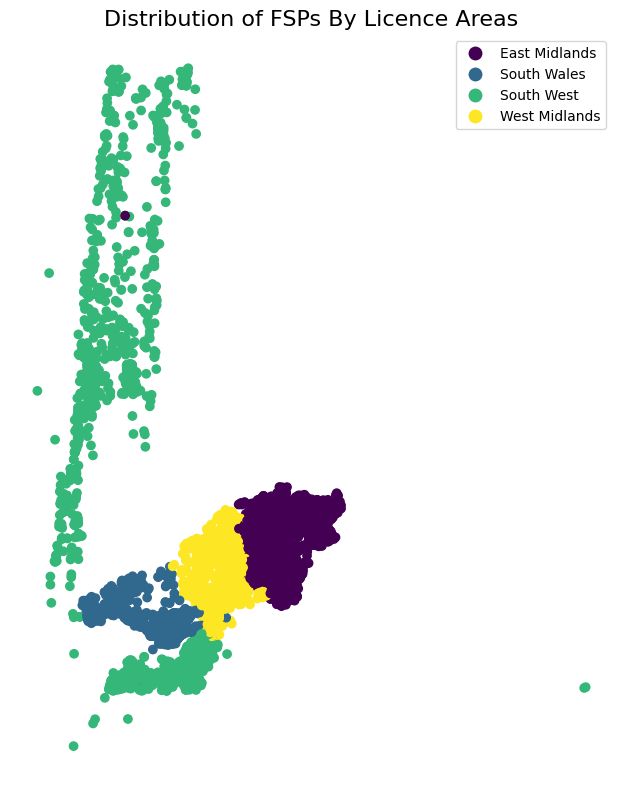

In [59]:
# geojson_data[~geojson_data['Northings'].isna()].plot(column='Licence Area', figsize=(8,8), cmap='viridis', legend=True, color='red')
fig, ax = plt.subplots(figsize=(8, 8))

geojson_data[~geojson_data['Northings'].isna()].plot(
    column='Licence Area',
    ax=ax,
    legend=True,
    cmap='viridis',
)

# Add title and adjust layout
plt.title('Distribution of FSPs By Licence Areas', fontsize=16)
plt.axis('off')  # Remove axes
plt.tight_layout()

# Show the plot
plt.show()